Test the impact of errors in window power spectra on the pseudo-Cl as well as correlation functions. Reproduces Fig. 3 in the paper.

In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
from imaster_paper_args import *

Start_client: No scheduler file, will start local cluster at  ./temp_skylens/pid20575/


In [3]:
test=False #if true, run test case to make sure code runs.

In [4]:
#some skylens args. 

do_pseudo_cl=True
do_xi=False

use_binned_l=False

do_cov=False

nside=1024
use_window=True

bin_cl=True
bin_xi=True

In [5]:
#setup parameters
lmax_cl=nside*2
lmax2=int(lmax_cl/2)#1000
if test:
    lmax_cl=200
    lmax2=150
    nside=512
    
lmin_cl=0
l0=np.arange(lmin_cl,lmax_cl)

lmin_cl_Bins=lmin_cl+10
lmax_cl_Bins=lmax2 #1000 #lmax_cl-10
Nl_bins=40
l_bins=np.unique(np.int64(np.logspace(np.log10(lmin_cl_Bins),np.log10(lmax_cl_Bins),Nl_bins+1)))
# l_bins=get_l_bins(l_min=lmin_cl_Bins,l_max=lmax_cl_Bins,N_bins=Nl_bins,binning_scheme='log',min_modes=500)
lb=0.5*(l_bins[1:]+l_bins[:-1])
Nl_bins=len(lb)
# l=np.unique(np.int64(np.logspace(np.log10(lmin_cl+1),np.log10(lmax_cl),Nl_bins*20))) #if we want to use fewer ell
l=l0
window_lmax=lmax_cl_Bins*2

if window_lmax>3*nside:
    print('nside of window too small')

##  Test with 1 redshift bin

In [6]:
#setup tomographic bins
shear_zbins=lsst_source_tomo_bins(nbins=1,use_window=use_window,nside=nside,f_sky=f_sky,zp=np.array([z0_shear]),ns0=ns0_shear)
galaxy_zbins=lsst_source_tomo_bins(nbins=1,use_window=use_window,nside=nside,f_sky=f_sky,zp=np.array([z0_galaxy]),ns0=ns0_galaxy)

ns0:  30.0
[1] 100 5
source_tomo_bins, zmax 5.0 1 0.3
Tracer utils has no tracers
Tracer utils has tracers:  ['galaxy']
pk_params dict was none, intialized with default
cosmo_params dict was none, intialized with default
cosmology interpolation range 0.0 4.005
power spectra camb_pk_too_many_z
Win gen: step size 273 3072 31.0 10
Window done. Size: 0.0


/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/cov_utils.py:92: RuntimeWarning: invalid value encountered in true_divide
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/angular_power_spectra.py:23: RuntimeWarning: divide by zero encountered in true_divide
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/angular_power_spectra.py:115: RuntimeWarning: divide by zero encountered in true_divide


scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary


/verafs/home/sukhdeep/.local/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/sphtfunc.py:433: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  warnings.warn(
/verafs/home/sukhdeep/.local/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/sphtfunc.py:822: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  warnings.warn(
/verafs/home/sukhdeep/.local/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/sphtfunc.py:827: UserWarning: -> fwhm is 0.000000 arcmin
  warnings.warn(
/verafs/scratch/phy200040p/sukhdeep/project/skylens/skylens/survey_utils.py:126: RuntimeWarning: invalid value encountered in sqrt
  cl_map_noise=np.sqrt(cl_map)
/verafs/scratch/phy200040p/sukhdeep/project/skylens/skylens/survey_utils.py:132: RuntimeWarning: invalid value encountered in sqrt
  shear_zbins[i]['window_N']=np.sqrt(sh

ns0:  10.0
[0.5] 100 5
source_tomo_bins, zmax 5.0 0.5 0.22499999999999998
Tracer utils has no tracers
Tracer utils has tracers:  ['galaxy']
pk_params dict was none, intialized with default
cosmo_params dict was none, intialized with default
cosmology interpolation range 0.0 4.005
power spectra camb_pk_too_many_z
Win gen: step size 273 3072 31.0 10
Window done. Size: 0.0
scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary


In [7]:
#choose the cross correlation to test here.
corrs=[corr_gg]
corr=corrs[0]

In [8]:
Skylens_kwargs=parse_dict(locals())

In [9]:
#setup skylens object
#use all ell
Skylens_kwargs['use_window']=False
SL0=Skylens(**Skylens_kwargs)
SL0.gather_data()
Skylens_kwargs['use_window']=True

Tracer utils has tracers:  ['shear', 'galaxy']
pk_params dict was none, intialized with default
cosmo_params dict was none, intialized with default
cosmology interpolation range 0.0 4.005
power spectra camb_pk_too_many_z
Win gen: step size 100 2048 2049.0 2
Window done. Size: 0.0
gather_dict got empty dictionary
gather_dict got empty dictionary
gather_dict got empty dictionary
gather_dict got empty dictionary


In [10]:
%time cl0G=SL0.cl_tomo()  #compute graph for C_ell

scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary
CPU times: user 17.5 s, sys: 516 ms, total: 18 s
Wall time: 2.04 s


In [11]:
win_Cl=client.compute(cl0G['cl'][corr][bi]).result() #we use same C_ell correlation as window C_l to compute M^W
cl0=win_Cl*1.

In [12]:
#read in wigner-3j matrices.
l_cl=SL0.l
#window_l=l0[:lmax2+1]
window_l=SL0.window_l
wu=window_utils(l=l0[:lmax2],window_l=window_l,l_cl=l_cl,use_window=True,s1_s2s={corr:s1_s2s[corr]},
                corrs=corrs,wigner_step=100,wigner_files=wigner_files)
wu.set_wig3j()
# wj2=client.compute(wu.wig_3j_2).result()
# wj2=wj2[0]['00']

Win gen: step size 100 1024 2049.0 10
wigner_files: {0: '/verafs/scratch/phy200040p/sukhdeep/physics2/skylens/temp/dask_wig3j_l5000_w5000_0_reorder.zarr', 2: '/verafs/scratch/phy200040p/sukhdeep/physics2/skylens/temp//dask_wig3j_l2200_w4400_2_reorder.zarr'}
wigner done dict_keys([])


In [13]:
M_lm={}
MN_lm={}

nl=len(wu.l)
nlw=len(wu.window_l)
nl_cl=len(wu.l_cl)

M=np.zeros((nl,nlw))
M_N=np.zeros((nl,nlw))

for lm in wu.lms:
    wj2i=client.compute(wu.wig_3j_2[lm]).result()
    wj2i=wj2i['00']
    wj2i=wj2i.transpose(0,2,1)
    start_i=lm
    end_i=lm+wu.step
    M_lm[lm]=wj2i@(win_Cl*(2*l0+1))
    M[start_i:end_i,:]+=M_lm[lm]
    
    MN_lm[lm]=wj2i@(np.ones_like(win_Cl)*(2*l0+1))
    M_N[start_i:end_i,:]+=MN_lm[lm]

    print(lm,'done')
M/=4.*np.pi
M*=(2*wu.window_l+1)
M_N/=4.*np.pi
M_N*=(2*wu.window_l+1)

0 done
100 done
200 done
300 done
400 done
500 done
600 done
700 done
800 done
900 done
1000 done


In [14]:
win_Cl2=win_Cl[:lmax2]*f_sky

In [15]:
#normailizing coupling matrix for some visual tests
EM=1./win_Cl2[:,None]*M
EM2=M*1./win_Cl2[:,None]

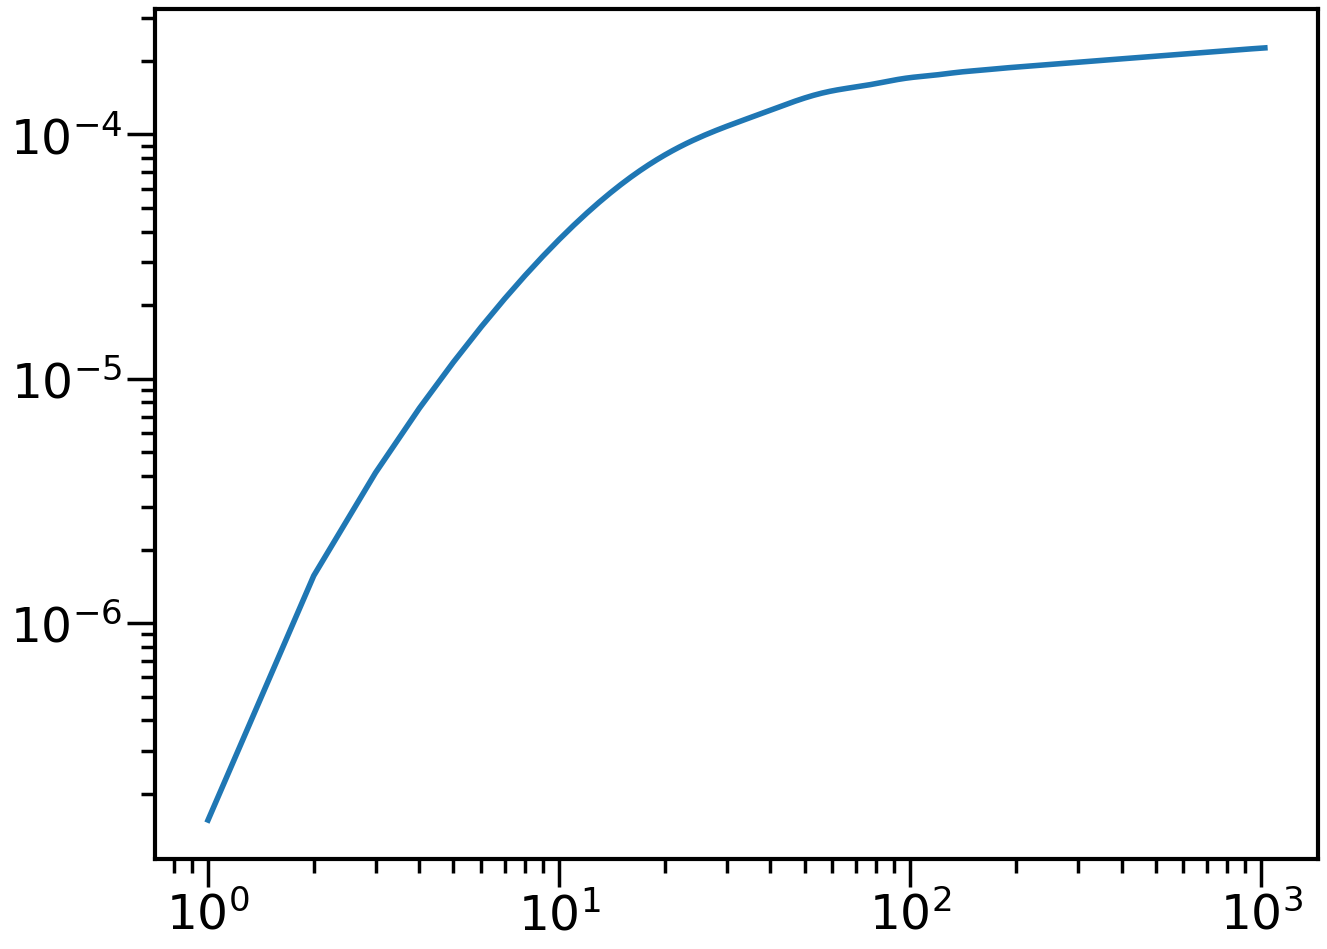

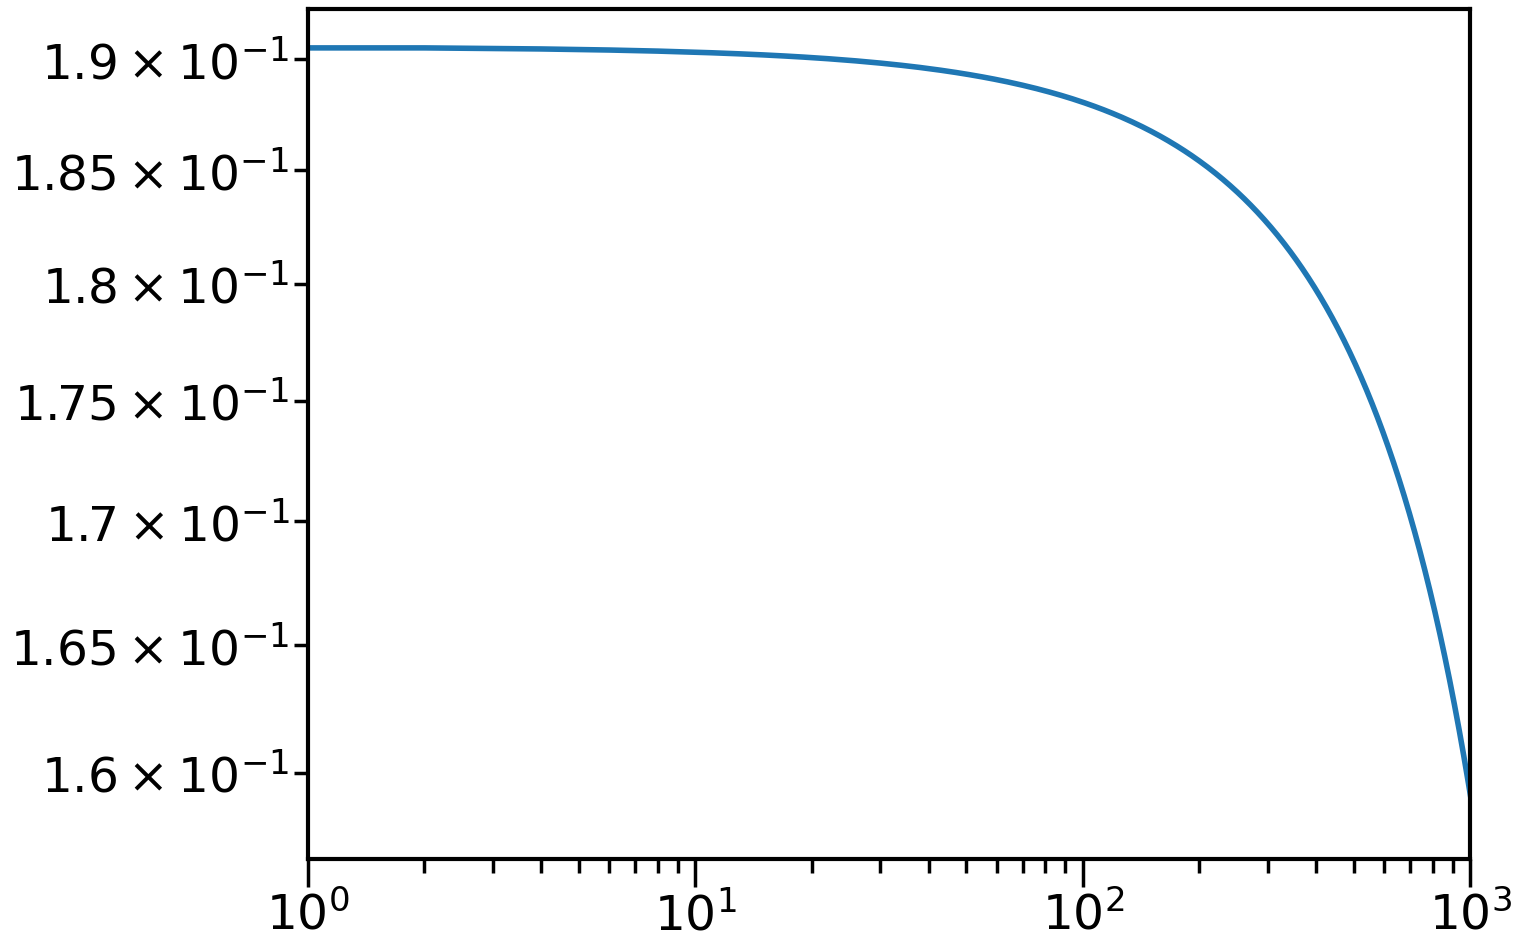

In [16]:
plot(l0[:lmax2]+1,np.diag(M)) #
xscale('log')
yscale('log')
show()
plot(wu.l+1,M@np.ones_like(wu.window_l))
xscale('log')
yscale('log')
xlim(1,1000)
show()

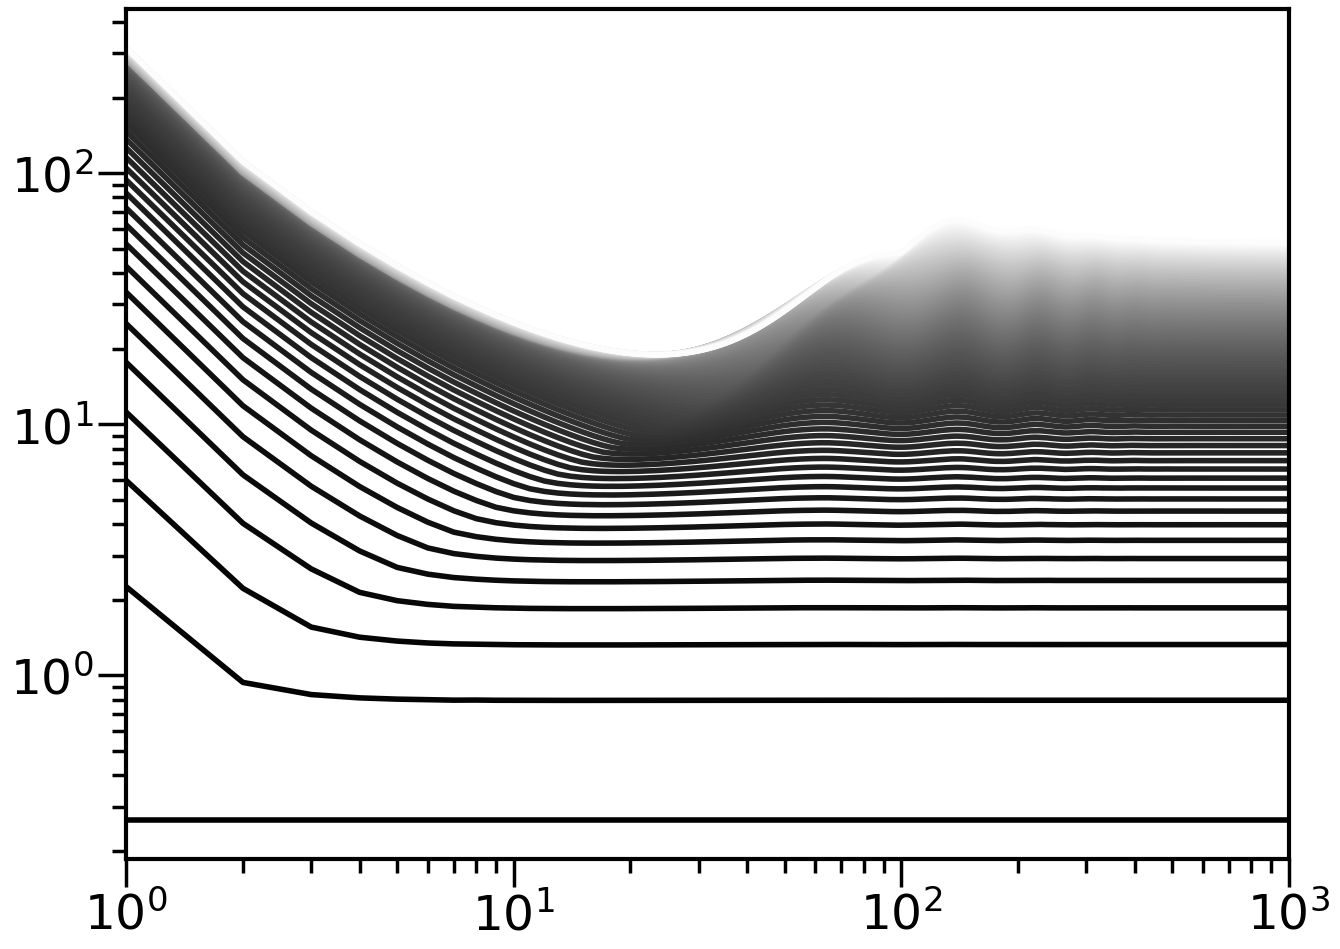

In [17]:
w_zeros=np.zeros_like(wu.window_l)
nwt=100
for i in np.arange(nwt):
    wz=w_zeros*1.
    wz[i]=1
    col = (i/nwt, i/nwt, i/nwt)
    plot(wu.l+1,(M@wz)/win_Cl2,color=col)
xscale('log')
yscale('log')
xlim(1,1000)
show()

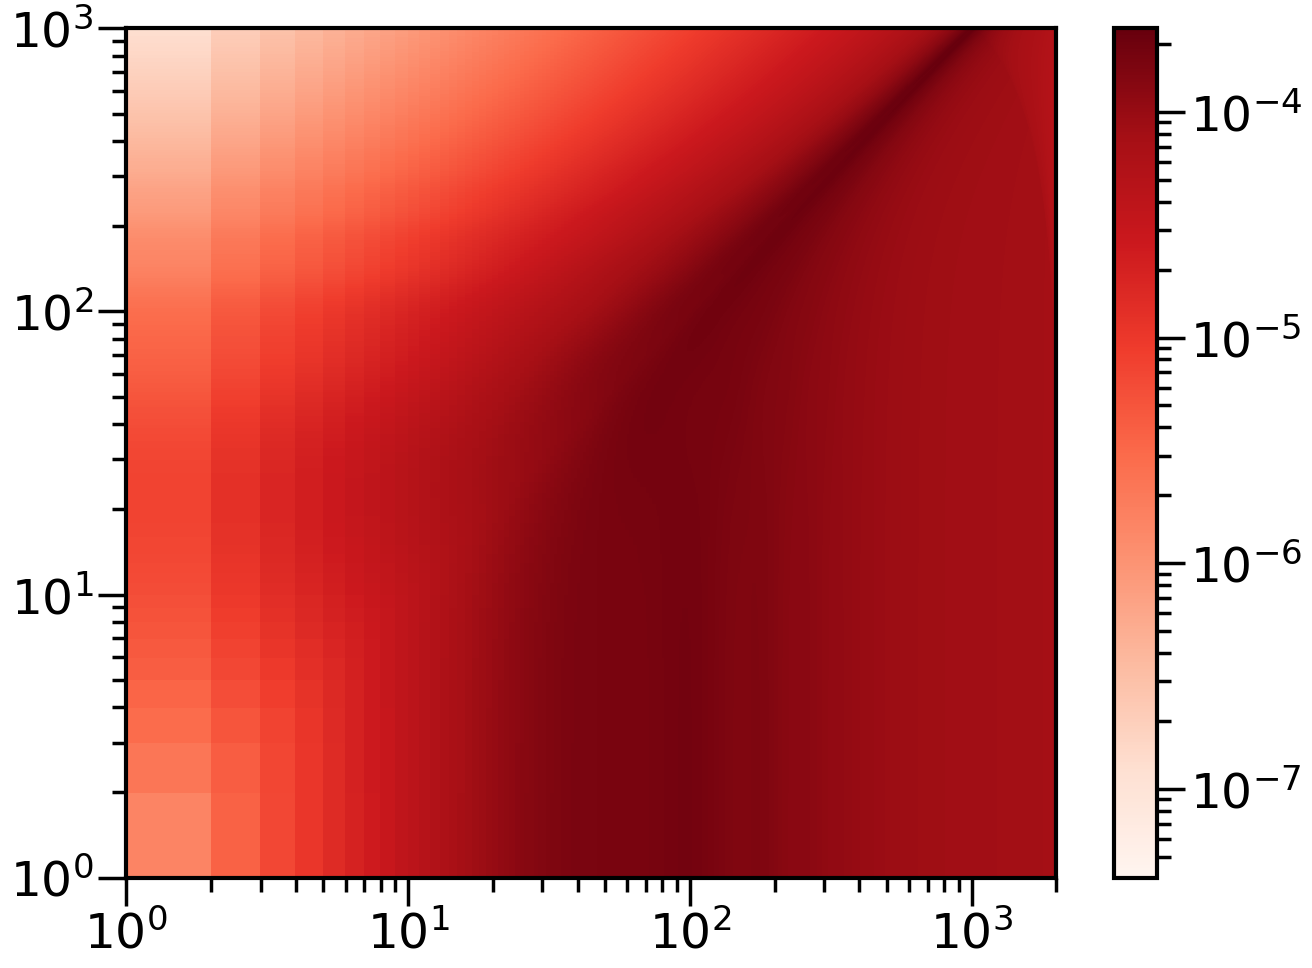

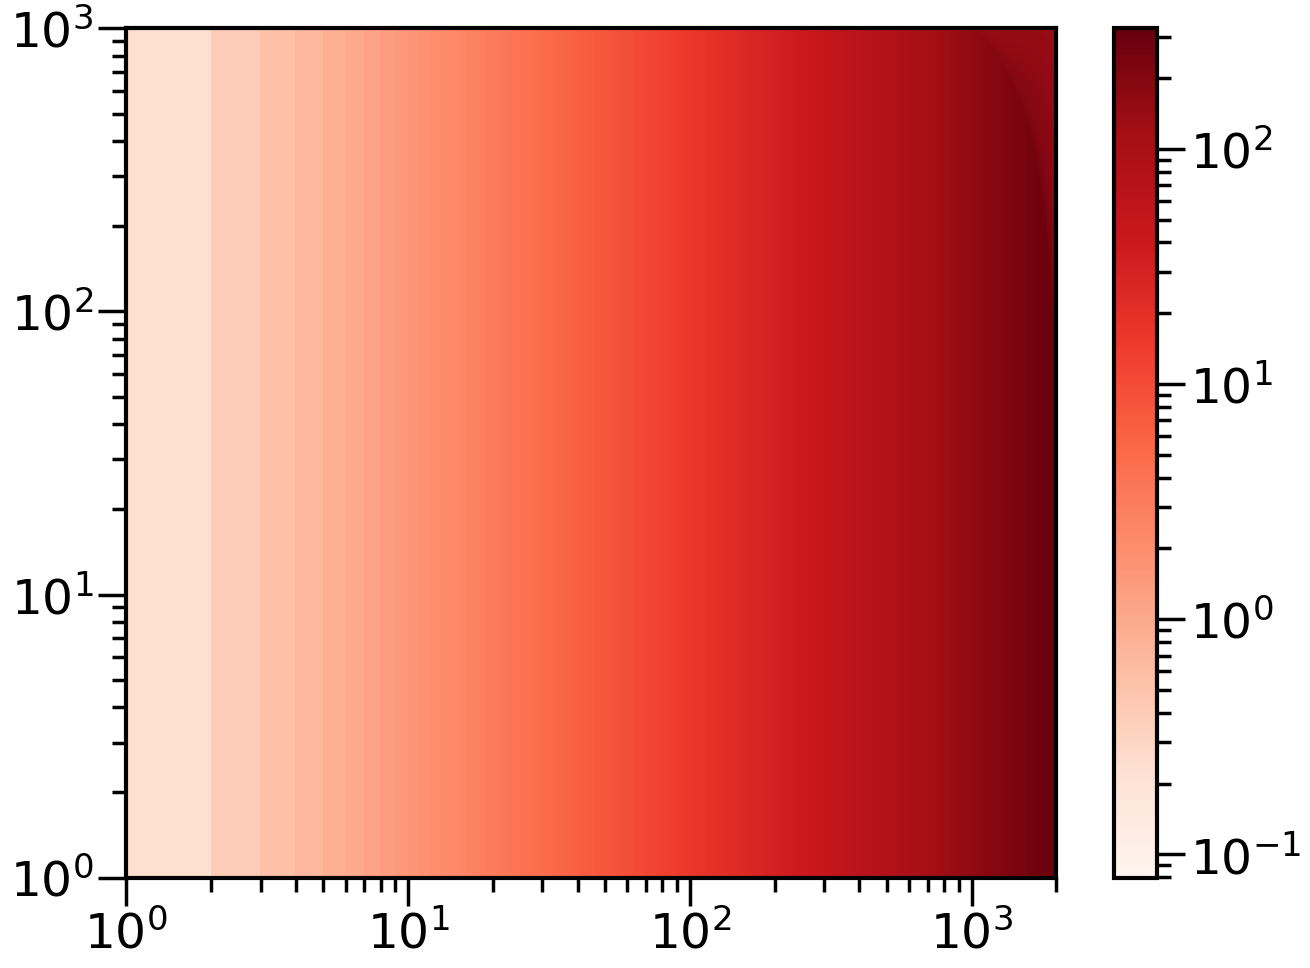

In [18]:
pcolormesh(M,cmap='Reds',norm=LogNorm(),rasterized=True)
loglog()
xlim(1,2000)
ylim(1,1000)
colorbar()
show()
pcolormesh(M_N,cmap='Reds',norm=LogNorm(),rasterized=True)
loglog()
xlim(1,2000)
ylim(1,1000)
colorbar()
show()

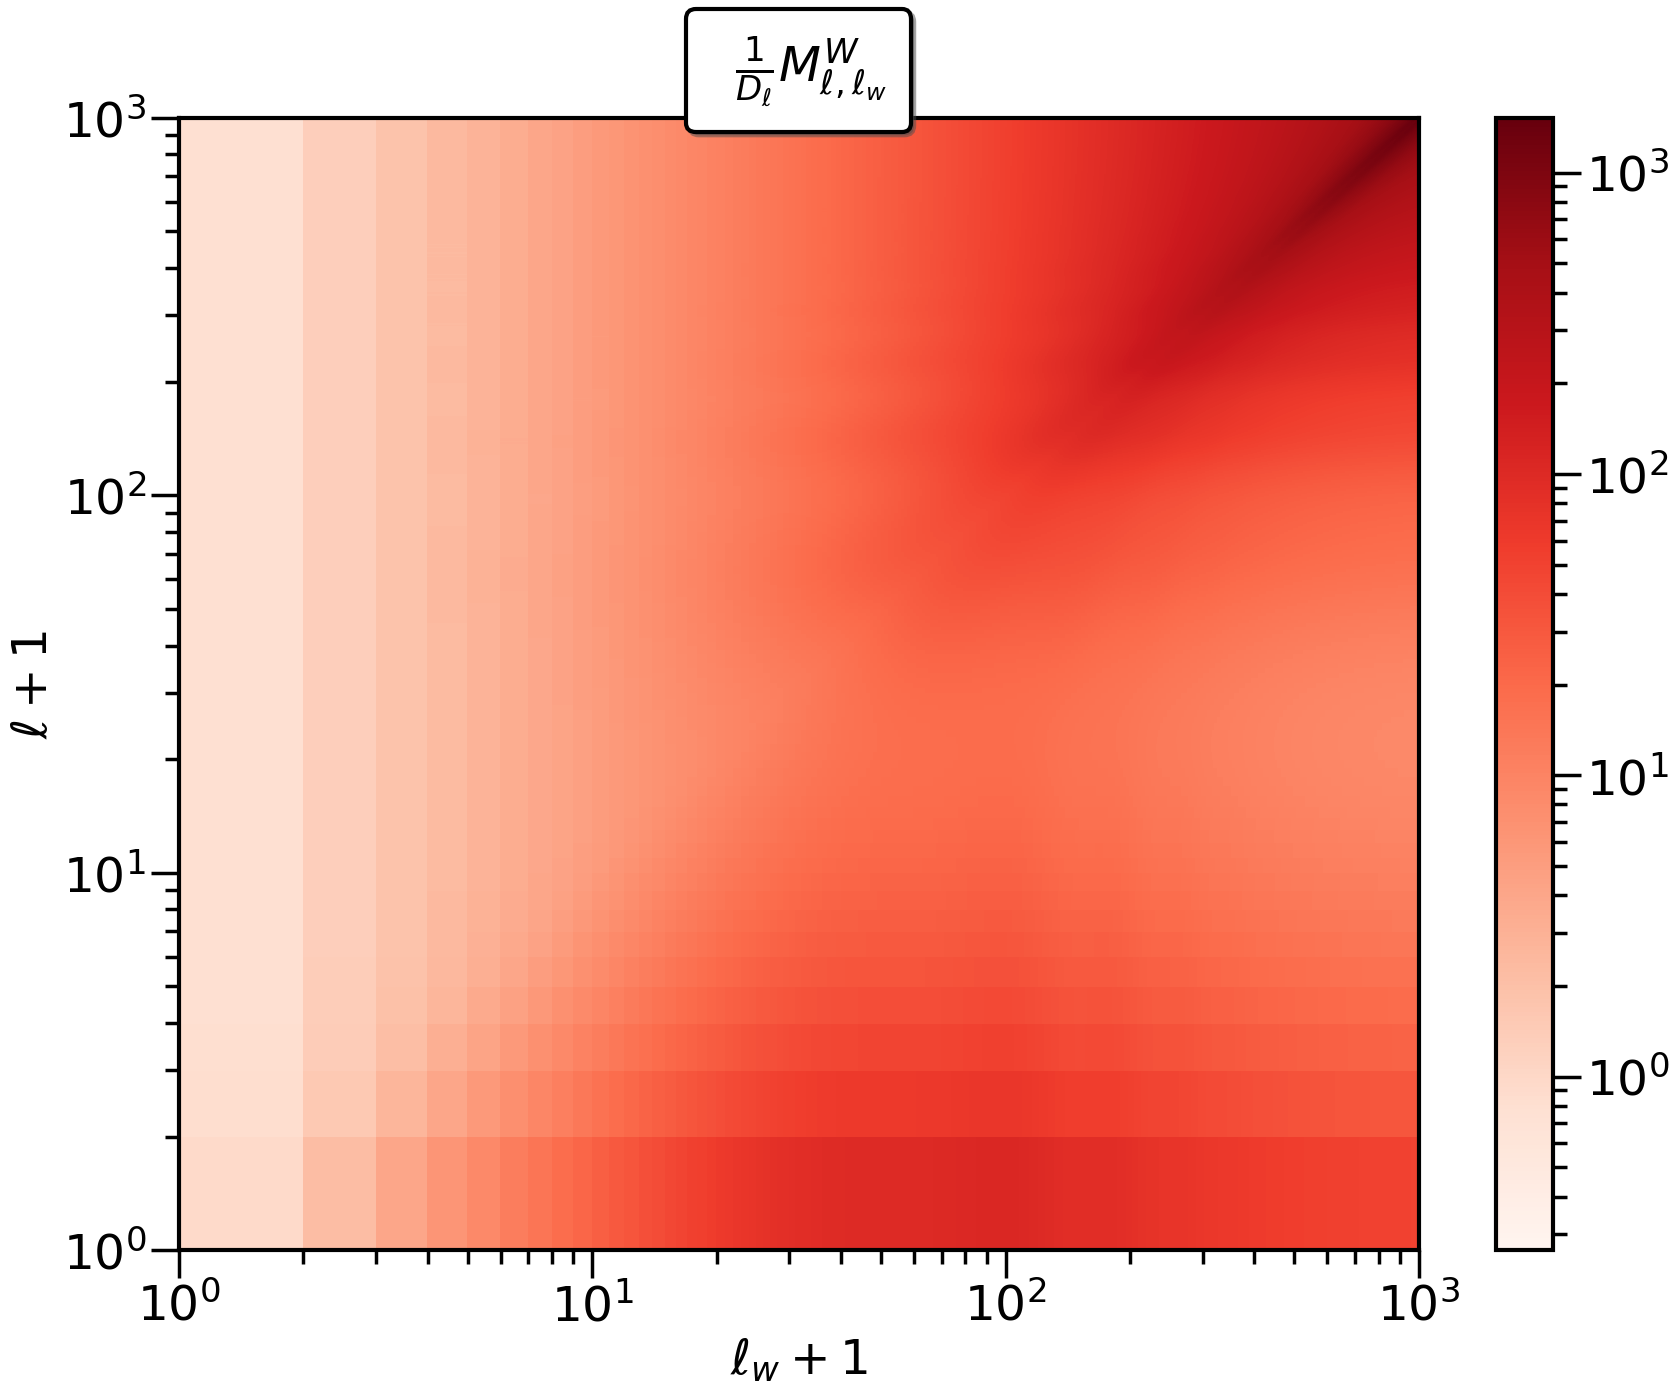

In [19]:
fig, ax =subplots(1,1,figsize=(20,15),sharex='col',sharey='row')
# cc=ax.pcolor(1+l0[:lmax2],1+l0[:lmax2],EM[:,:lmax2],cmap='Reds',norm=LogNorm(),label=r'$\frac{1}{D_\ell}M^W_{\ell,\ell}$',rasterized=True)
#1+wu.l,1+wu.window_l
cc=ax.pcolormesh(EM,cmap='Reds',norm=LogNorm(),label=r'$\frac{1}{D_\ell}M^W_{\ell,\ell}$',rasterized=True)
ax.plot(1,1,label=r'$\frac{1}{D_\ell}M^W_{\ell,\ell_w}$')
# ax.title(r'$\frac{1}{D_\ell}M^W_{\ell,\ell}$')
ax.legend(handlelength=0,loc='upper center',bbox_to_anchor=(0.5,1.1))
ax.loglog()
ax.set_xlim(1,1000)
ax.set_ylim(1,1000)

ax.set_xlabel(r'$\ell_w+1$')
ax.set_ylabel(r'$\ell+1$')
fig.colorbar(cc)
fname=fig_home+'window_error_coupling'
fname+='.pdf'
show()
if not test:
#     fig.savefig(fname,bbox_inches='tight',format='pdf')
    pass

In [20]:
w_alm=hp.map2alm(shear_zbins[0]['window'])
wlt0=hp.anafast(shear_zbins[0]['window'])

[]

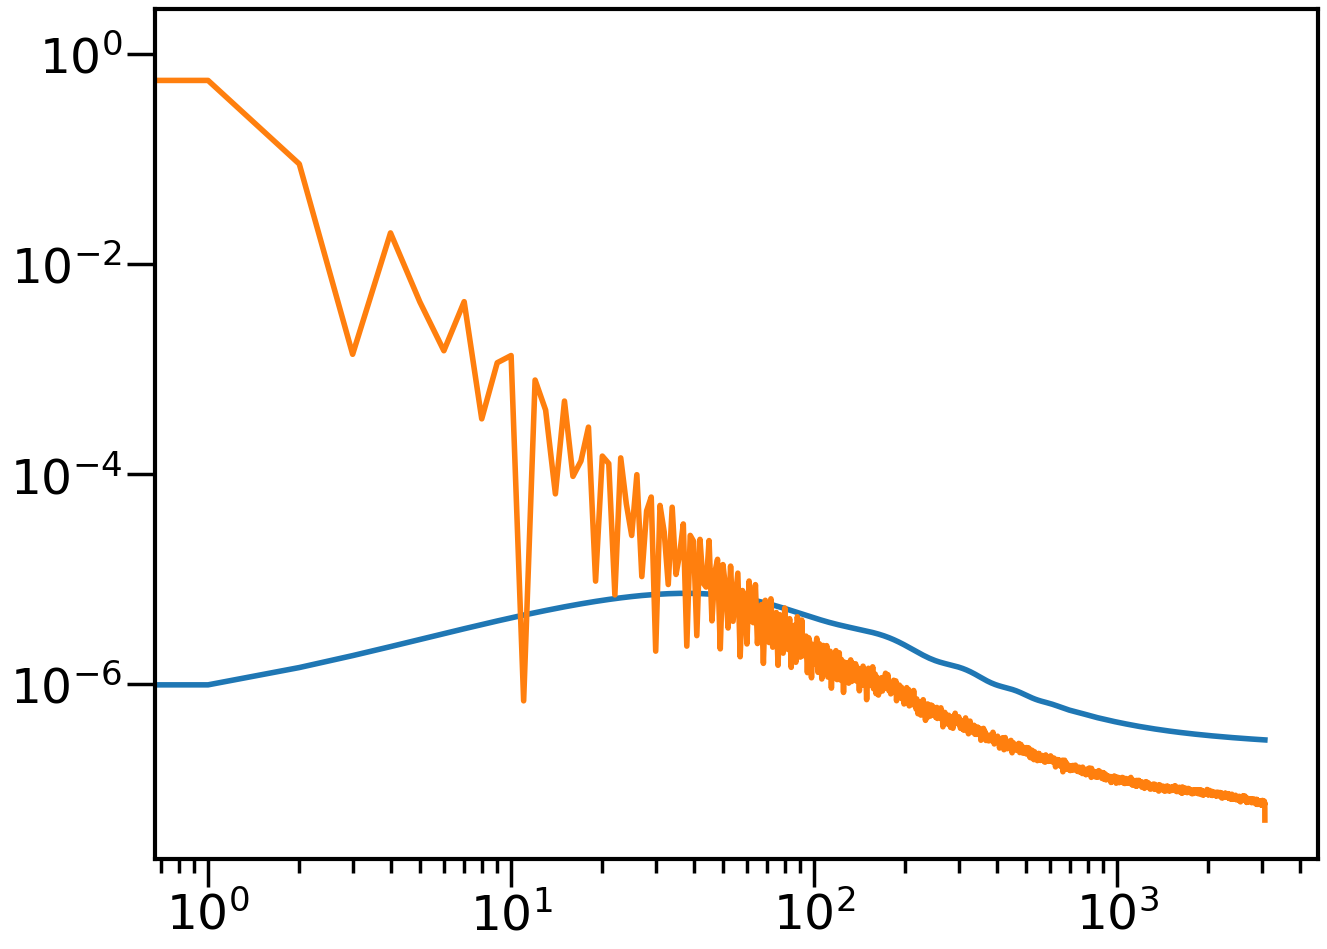

In [21]:
plot(shear_zbins[0]['window_cl0'])
plot(wlt0)
loglog()

In [22]:
#set up new contaminated window.
fsky=0.3
lmm=3*nside
lt=np.arange(lmm)
Nl=np.mean(wlt0[100:200])
Nl*=2
cov=2./(2*lt+1)/fsky*((wlt0+Nl)**2)
err=np.sqrt(cov)
err[:10]=0
# fl=1+0.4/np.sqrt(lmm)*np.sqrt(lt)
fl=1+np.sqrt(err/wlt0)
# w_alm2=hp.almxfl(w_alm,fl,inplace=False)
w_alm2=w_alm+hp.synalm(err)

/verafs/home/sukhdeep/.local/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/sphtfunc.py:433: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  warnings.warn(


In [23]:
mask=shear_zbins[0]['window']!=hp.UNSEEN
# ww=hp.alm2map(w_alm2,nside=nside)#skylens_kwargs[0]['shear_zbins'][0]['window']*.995
ww=hp.synfast(err,nside=nside)
ww-=ww[mask].mean()
ww[~mask]=hp.UNSEEN
cl_map=ww+shear_zbins[0]['window']
cl_map[~mask]=hp.UNSEEN

cl_mapg=ww+galaxy_zbins[0]['window']
cl_mapg[~mask]=hp.UNSEEN

wlt=hp.anafast(cl_map)


ww[mask].mean(),cl_map[mask].mean(),shear_zbins[0]['window'][mask].mean(),(1./shear_zbins[0]['window'][mask]).mean()

/verafs/home/sukhdeep/.local/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/sphtfunc.py:822: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  warnings.warn(
/verafs/home/sukhdeep/.local/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/sphtfunc.py:827: UserWarning: -> fwhm is 0.000000 arcmin
  warnings.warn(


(-1.1256128510403923e-18,
 1.0056490856770133,
 1.0056490856770137,
 306.59922714655085)

In [24]:
mlt=hp.anafast(mask)

In [25]:
N_map=np.sqrt(cl_map)
N_m_map=1./shear_zbins[0]['window_N']
N_map[~mask]=hp.UNSEEN
N_m_map[~mask]=hp.UNSEEN

Nwlt=hp.anafast(N_map)
Nmlt=hp.anafast(N_m_map)
Nwlt0=hp.anafast(shear_zbins[0]['window_N'])


<ipython-input-25-16d39501dc2f>:1: RuntimeWarning: invalid value encountered in sqrt
  N_map=np.sqrt(cl_map)


In [26]:
shear_zbins2=copy.deepcopy(shear_zbins)
shear_zbins2[0]['window']=cl_map

galaxy_zbins2=copy.deepcopy(galaxy_zbins)
galaxy_zbins2[0]['window']=cl_mapg

In [27]:
Skylens_kwargs['use_window']=True
Skylens_kwargs['use_binned_l']=True
Skylens_kwargs['wigner_step']=100
Skylens_kwargs['l']=l0[:lmax2]

Skylens_kwargs2=copy.deepcopy(Skylens_kwargs)
Skylens_kwargs2['shear_zbins']=shear_zbins2
Skylens_kwargs2['galaxy_zbins']=galaxy_zbins2

In [28]:
pcl0=np.zeros_like(SL0.l,dtype='float64')
pcl2=np.zeros_like(SL0.l,dtype='float64')

pNl0=np.zeros_like(SL0.l,dtype='float64')
pNl2=np.zeros_like(SL0.l,dtype='float64')

# pcl0[:lmax2]+=M0@cl0[:lmax2]
# pcl2[:lmax2]+=M2@cl0[:lmax2]

pcl0[:lmax2]+=M@wlt0[wu.window_l]
pcl2[:lmax2]+=M@wlt[wu.window_l]

pNl0[:lmax2]+=M_N@Nwlt0[wu.window_l]
pNl2[:lmax2]+=M_N@Nwlt[wu.window_l]

pcl0_b=SL0.bin_cl_func(cl=pcl0)
pcl2_b=SL0.bin_cl_func(cl=pcl2)

pNl0_b=SL0.bin_cl_func(cl=pNl0)
pNl2_b=SL0.bin_cl_func(cl=pNl2)

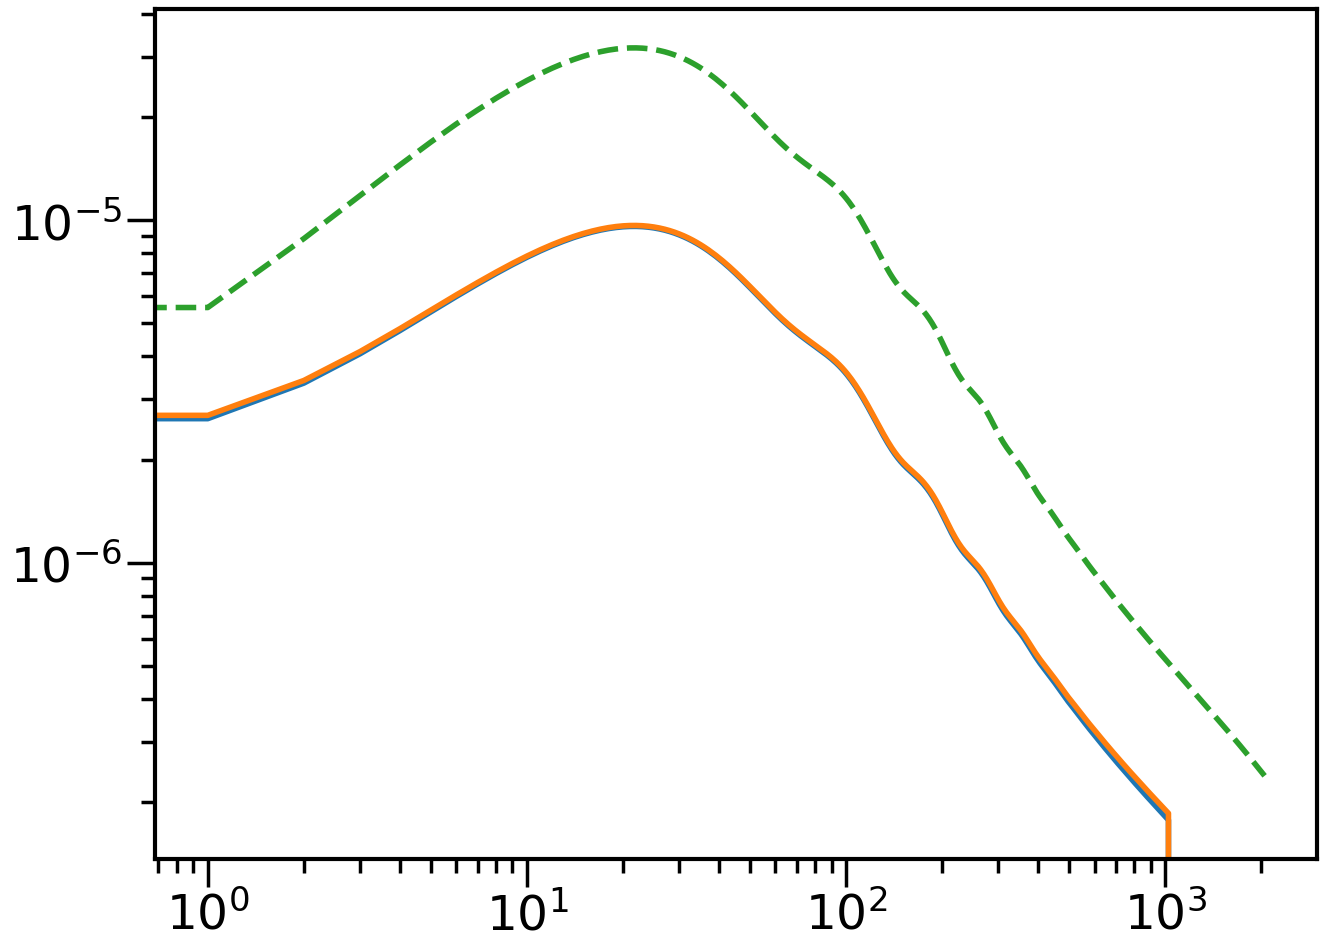

<ipython-input-29-a3b28317c251>:6: RuntimeWarning: invalid value encountered in true_divide
  plot(l0,1-pcl0/pcl2)


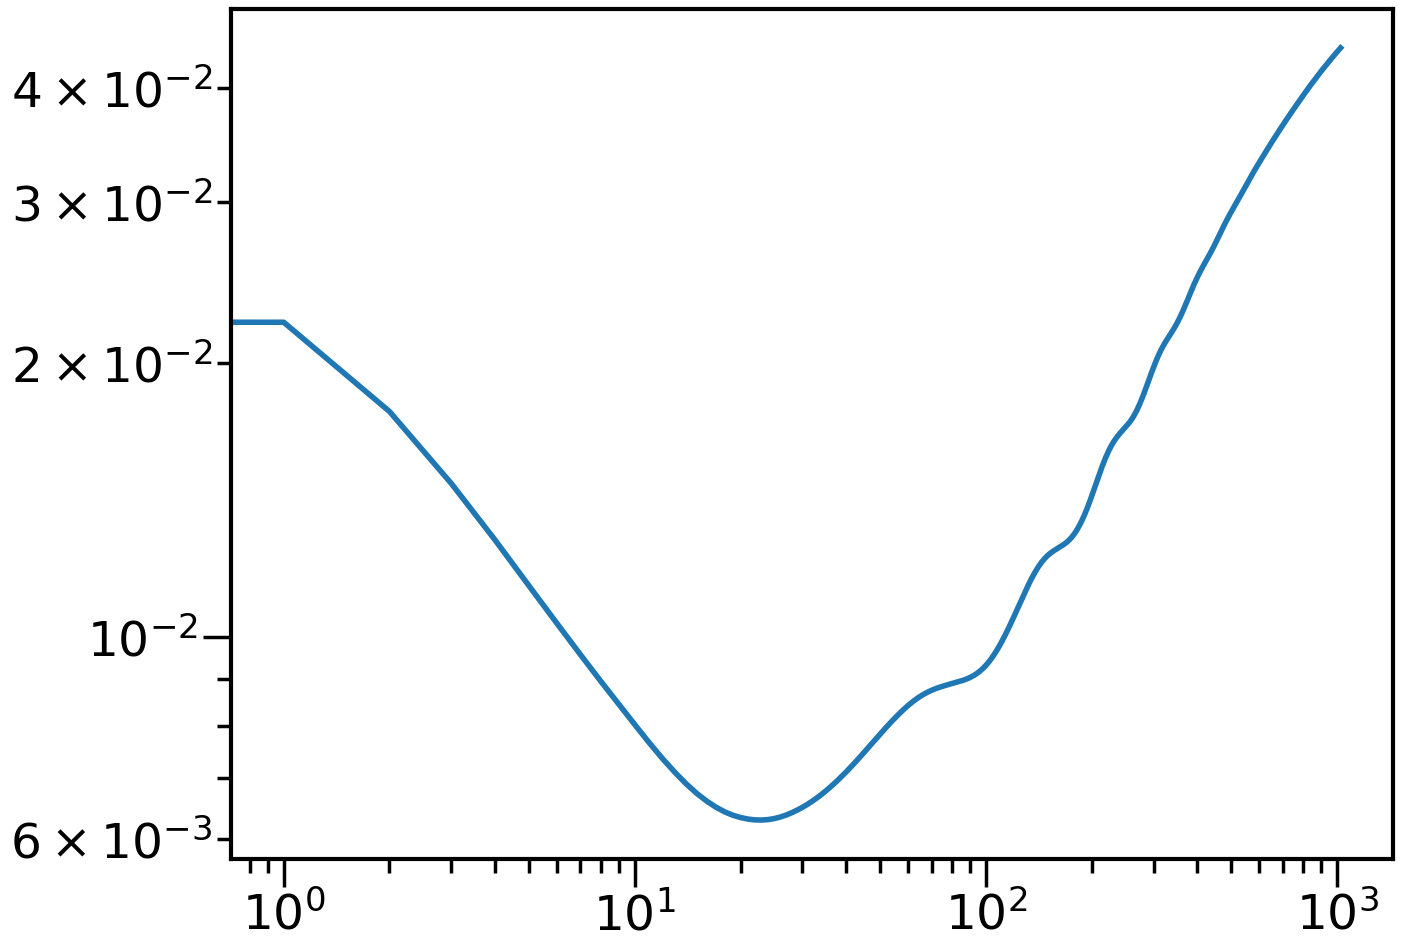

In [29]:
plot(l0,pcl0)
plot(l0,pcl2)
plot(l0,cl0,'--')
loglog()
show()
plot(l0,1-pcl0/pcl2)
xscale('log')
yscale('log')

<ipython-input-30-6e909212cfcc>:15: RuntimeWarning: invalid value encountered in true_divide
  plot(l0,np.absolute(mcl0/pcl0-1),'--',label='signal')
<ipython-input-30-6e909212cfcc>:16: RuntimeWarning: invalid value encountered in true_divide
  plot(l0,mNl0/pNl0-1,label='noise')


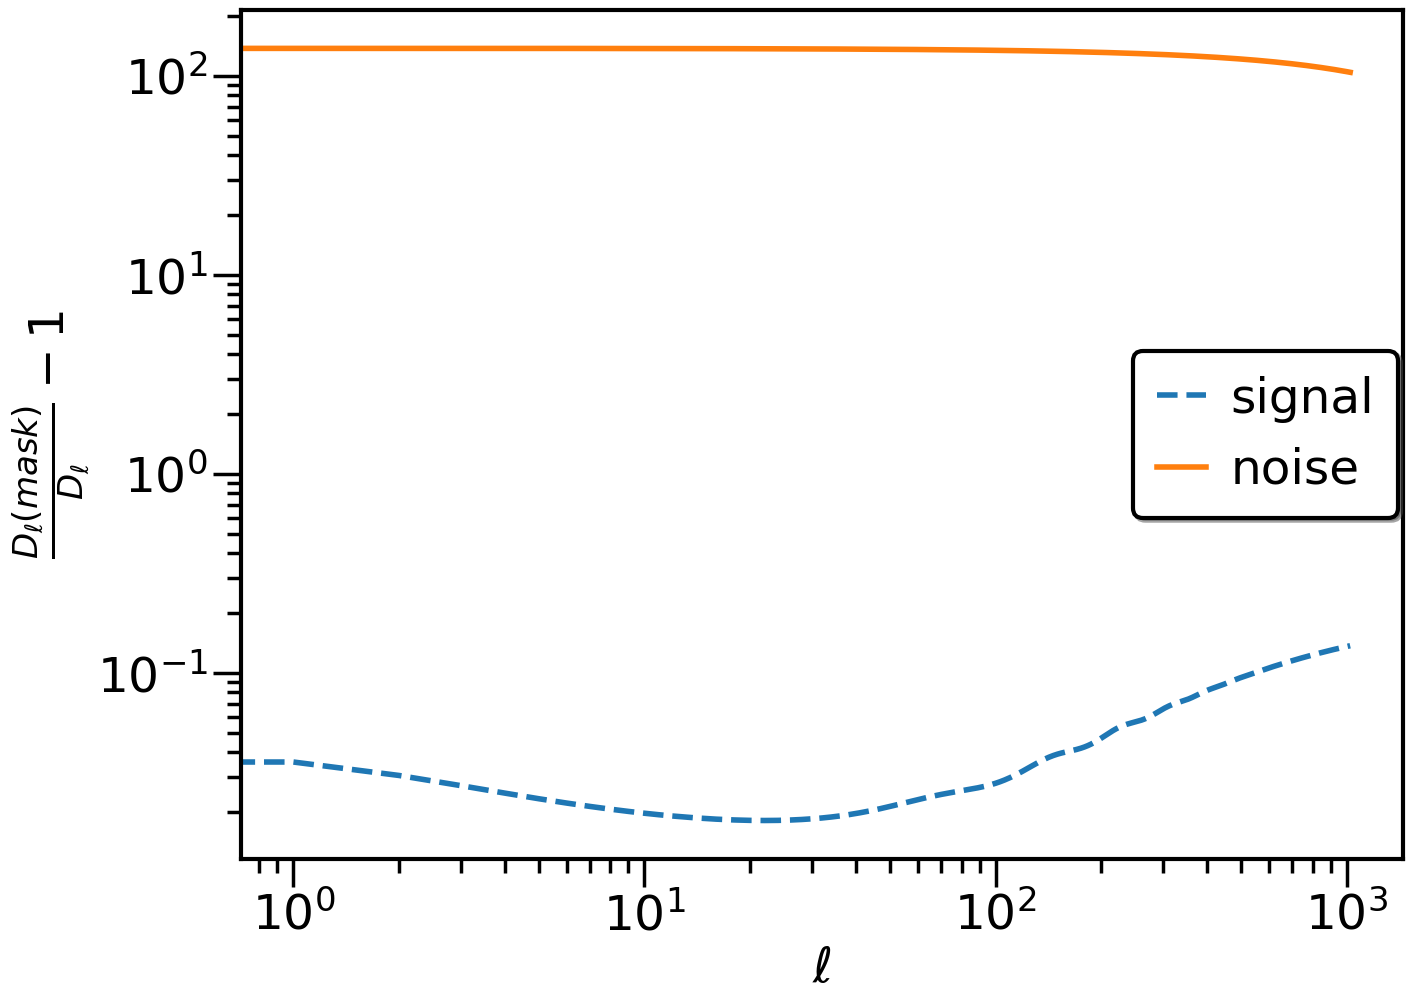

<ipython-input-30-6e909212cfcc>:23: RuntimeWarning: invalid value encountered in true_divide
  SN0=pcl0/pNl0*np.sqrt((2*l0+1))
<ipython-input-30-6e909212cfcc>:24: RuntimeWarning: invalid value encountered in true_divide
  SNm=mcl0/mNl0*np.sqrt((2*l0+1))


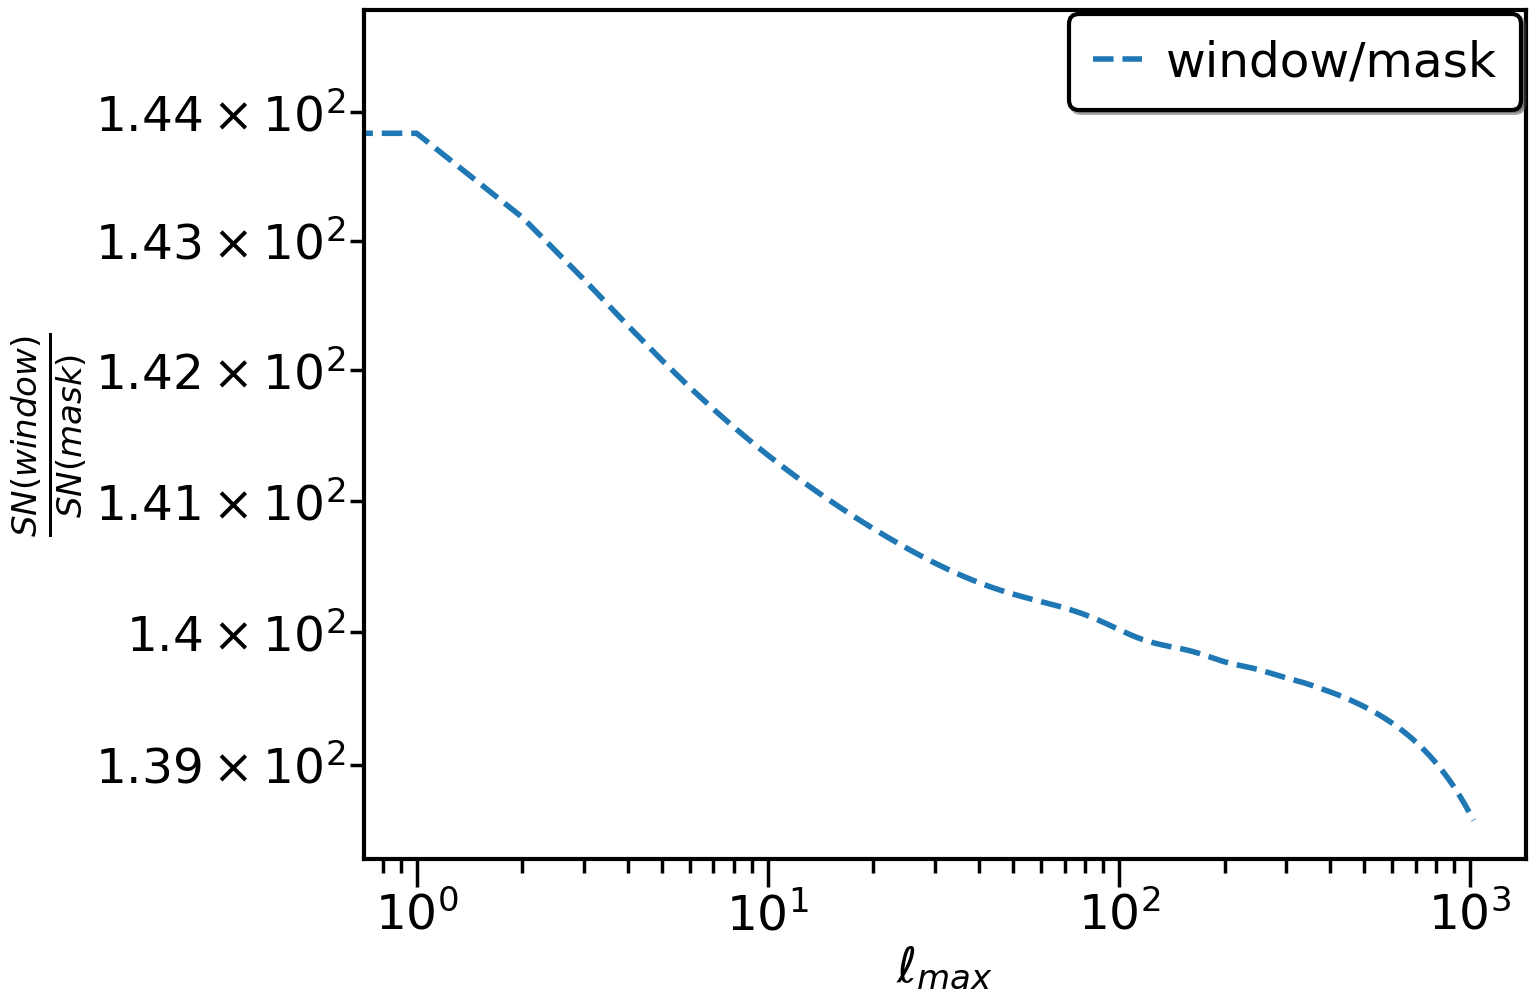

In [30]:
#compare the effects of window vs mask on noise and signal
mcl0=np.zeros_like(SL0.l,dtype='float64')
mcl0[:lmax2]+=M@mlt[wu.window_l]
mcl0_b=SL0.bin_cl_func(cl=mcl0)

mNl0=np.zeros_like(SL0.l,dtype='float64')
mNl0[:lmax2]+=M_N@Nmlt[wu.window_l]
mNl0_b=SL0.bin_cl_func(cl=mNl0)


# plot(l0,pNl0)
# plot(l0,mNl0,':')
# loglog()
# show()
plot(l0,np.absolute(mcl0/pcl0-1),'--',label='signal')
plot(l0,mNl0/pNl0-1,label='noise')
xscale('log')
yscale('log')
xlabel(r'$\ell$')
ylabel(r'$\frac{D_\ell(mask)}{D_\ell}-1$')
legend()
show()
SN0=pcl0/pNl0*np.sqrt((2*l0+1))
SNm=mcl0/mNl0*np.sqrt((2*l0+1))

SN0=np.sqrt(np.cumsum(SN0**2))
SNm=np.sqrt(np.cumsum(SNm**2))

plot(l0,SN0/SNm,'--',label='window/mask')
xscale('log')
yscale('log')
xlabel(r'$\ell_{max}$')
ylabel(r'$\frac{SN(window)}{SN(mask)}$')
legend()

In [31]:
Skylens_kwargs['do_cov']

False

In [32]:
Skylens_kwargs['l_cl']=l0[:lmax2]

In [33]:
#use all ell
kappa_win={0:Skylens(**Skylens_kwargs)}
kappa_win[0].gather_data()
kappa_win[1]=Skylens(**Skylens_kwargs2)
kappa_win[1].gather_data()

Tracer utils has tracers:  ['shear', 'galaxy']


/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/cov_utils.py:92: RuntimeWarning: invalid value encountered in true_divide
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/angular_power_spectra.py:23: RuntimeWarning: divide by zero encountered in true_divide


pk_params dict was none, intialized with default
cosmo_params dict was none, intialized with default
cosmology interpolation range 0.0 4.005
power spectra camb_pk_too_many_z
Win gen: step size 100 1024 2049.0 2
Window done. Size: 0.0
Tracer utils has tracers:  ['shear', 'galaxy']
pk_params dict was none, intialized with default
cosmo_params dict was none, intialized with default
cosmology interpolation range 0.0 4.005
power spectra camb_pk_too_many_z
Win gen: step size 100 40 2049.0 2
Window done. Size: 0.0


/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/angular_power_spectra.py:115: RuntimeWarning: divide by zero encountered in true_divide


scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary
scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary
set binned measure done
Tracer utils has tracers:  ['shear', 'galaxy']
pk_params dict was none, intialized with default
cosmo_params dict was none, intialized with default
cosmology interpolation range 0.0 4.005
power spectra camb_pk_too_many_z
Win gen: step size 100 1024 2049.0 2
scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary
scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary
wigner_files: {0: '/verafs/scratch/phy200040p/sukhdeep/physics2/skylens/temp/dask_wig3j_l5000_w5000_0_reorder.zarr', 2: '/verafs/scratch/phy200040p/sukhdeep/physics2/skylens/temp//dask_wig3j_l2200_w4400_2_reorder.zarr'}
wigner done dict_keys([])
set window_cl: cl0,cl_b done 0.12413763999938965
set window_cl: cl done 0.23547697067260742 1.287 0.0
Win_cli ('galaxy', 'galaxy', 0, 0) ('galaxy', 

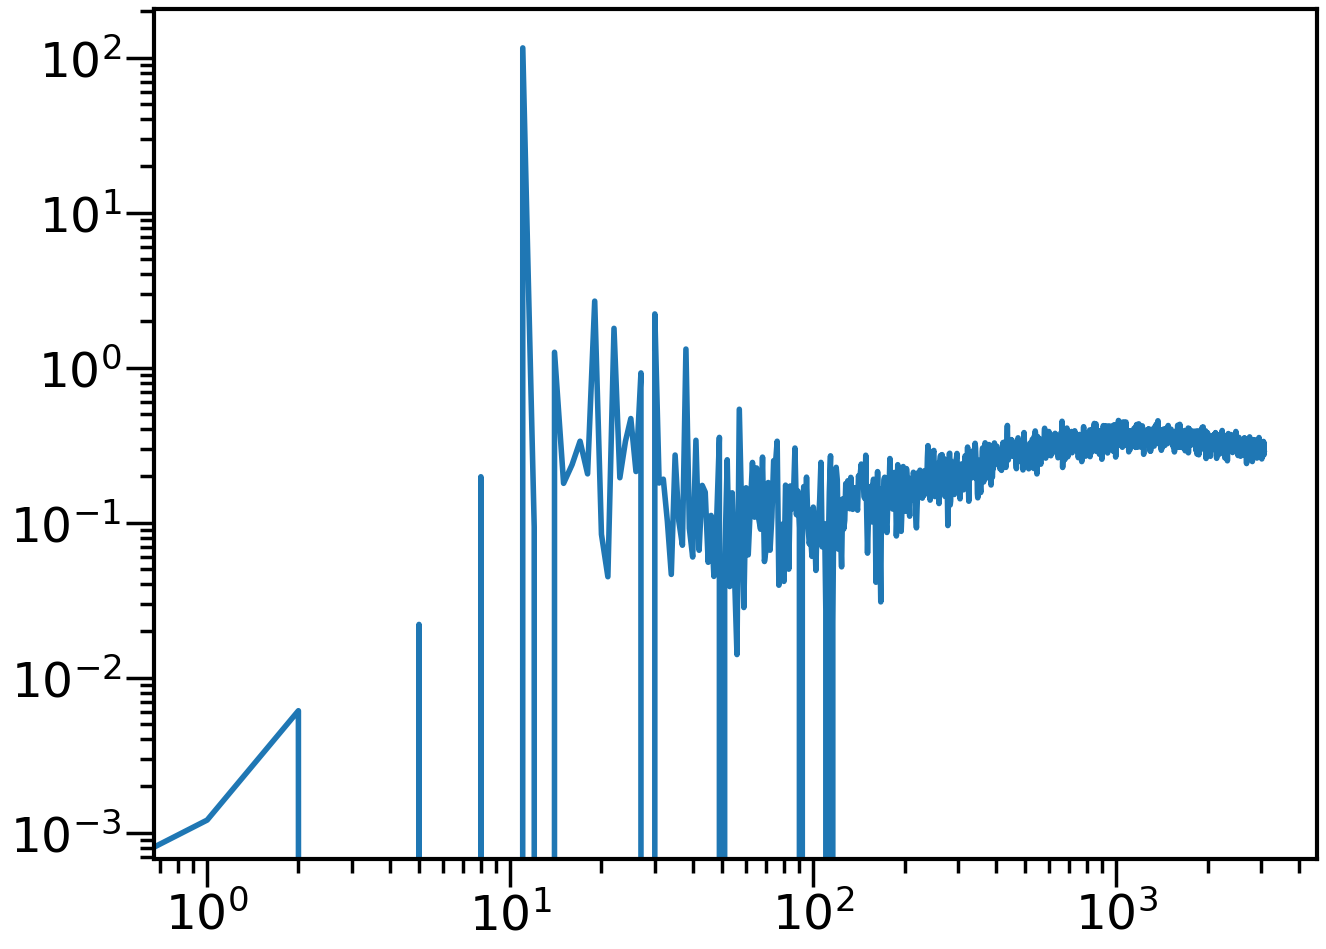

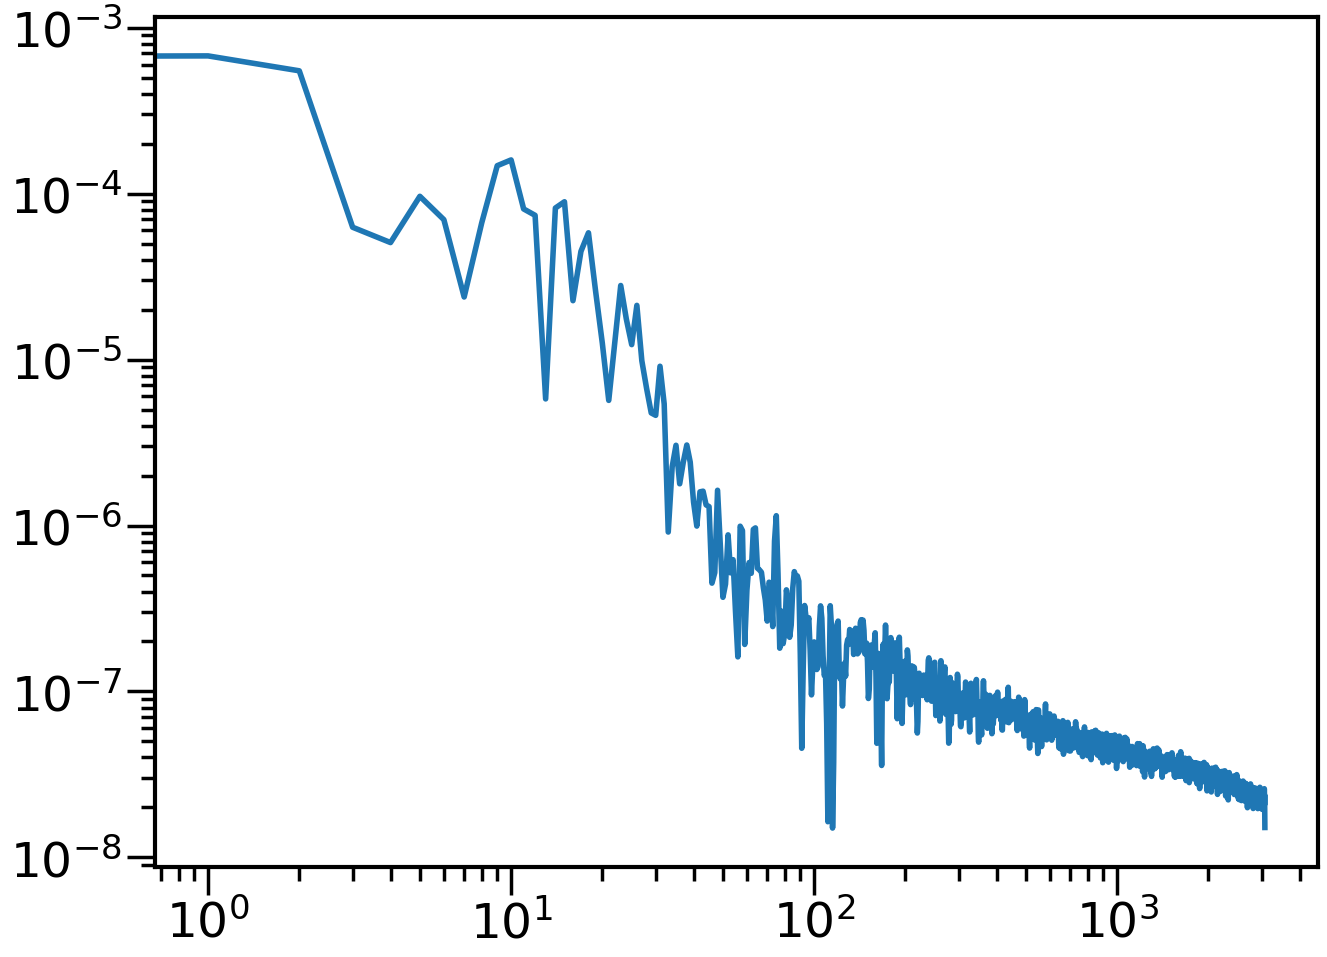

In [34]:
plot(wlt/wlt0-1)
xscale('log')
yscale('log')
show()
plot(np.absolute(wlt-wlt0))
xscale('log')
yscale('log')

In [35]:
kappa_win[0].l_cl

array([ 10.,  11.,  13.,  14.,  16.,  18.,  21.,  23.,  26.,  29.,  33.,
        37.,  42.,  47.,  53.,  59.,  67.,  75.,  85.,  95., 107., 120.,
       135., 151., 170., 191., 214., 241., 270., 303., 341., 383., 430.,
       483., 542., 609., 683., 767., 862., 968.])

In [36]:
clG_win={}
cl0_win={}
for i in kappa_win.keys():
    clG_win[i]=kappa_win[i].cl_tomo(corrs=corrs) 
    cl0_win[i]=clG_win[i]['stack'].compute()
pcl0_b=cl0_win[0]['pcl_b']
pcl2_b=cl0_win[1]['pcl_b']

/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/angular_power_spectra.py:115: RuntimeWarning: divide by zero encountered in true_divide


scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary
scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary


In [37]:
SL0.l

array([   0,    1,    2, ..., 2045, 2046, 2047])

In [38]:
# kappa_win[1].gather_data()
wltb=SL0.bin_cl_func(cl=wlt[SL0.l])
wlt0b=SL0.bin_cl_func(cl=wlt0[SL0.l])

(0.001, 0.5)

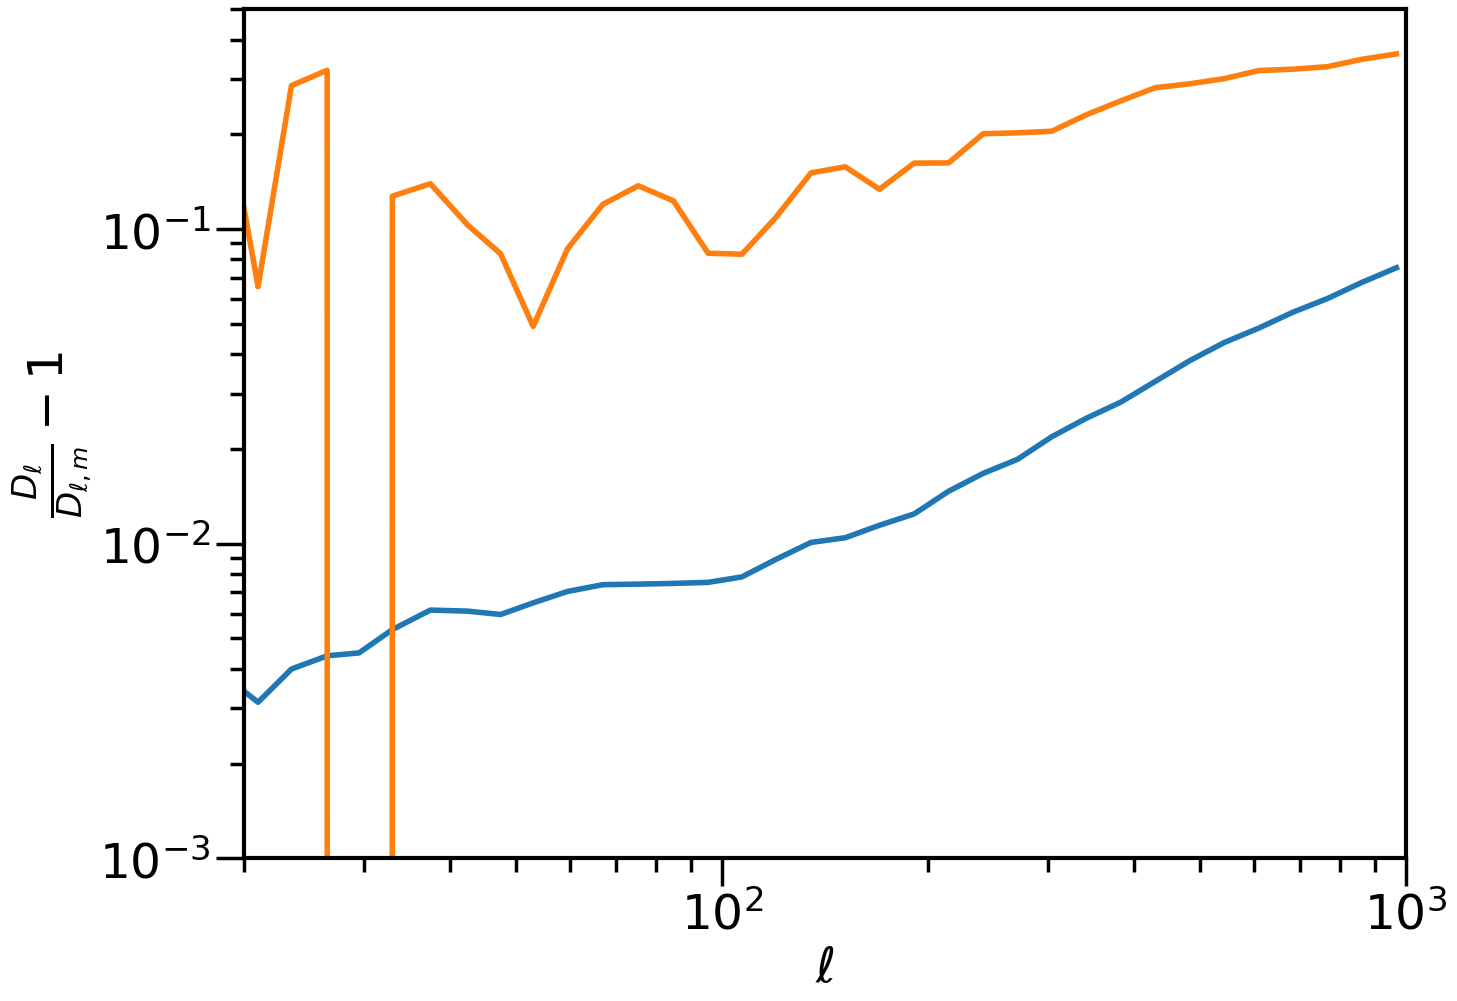

In [39]:
plot(lb,1.-pcl0_b/pcl2_b)
plot(lb,(wltb/wlt0b-1))
xscale('log')
# plot(lb,cl0_win['t']['pcl_b'])
xscale('log')
yscale('log')
xlabel(r'$\ell$')
ylabel(r'$\frac{D_\ell}{D_{\ell,m}}-1$')
xlim(20,1000)
ylim(0.001,.5)

(20, 1000)

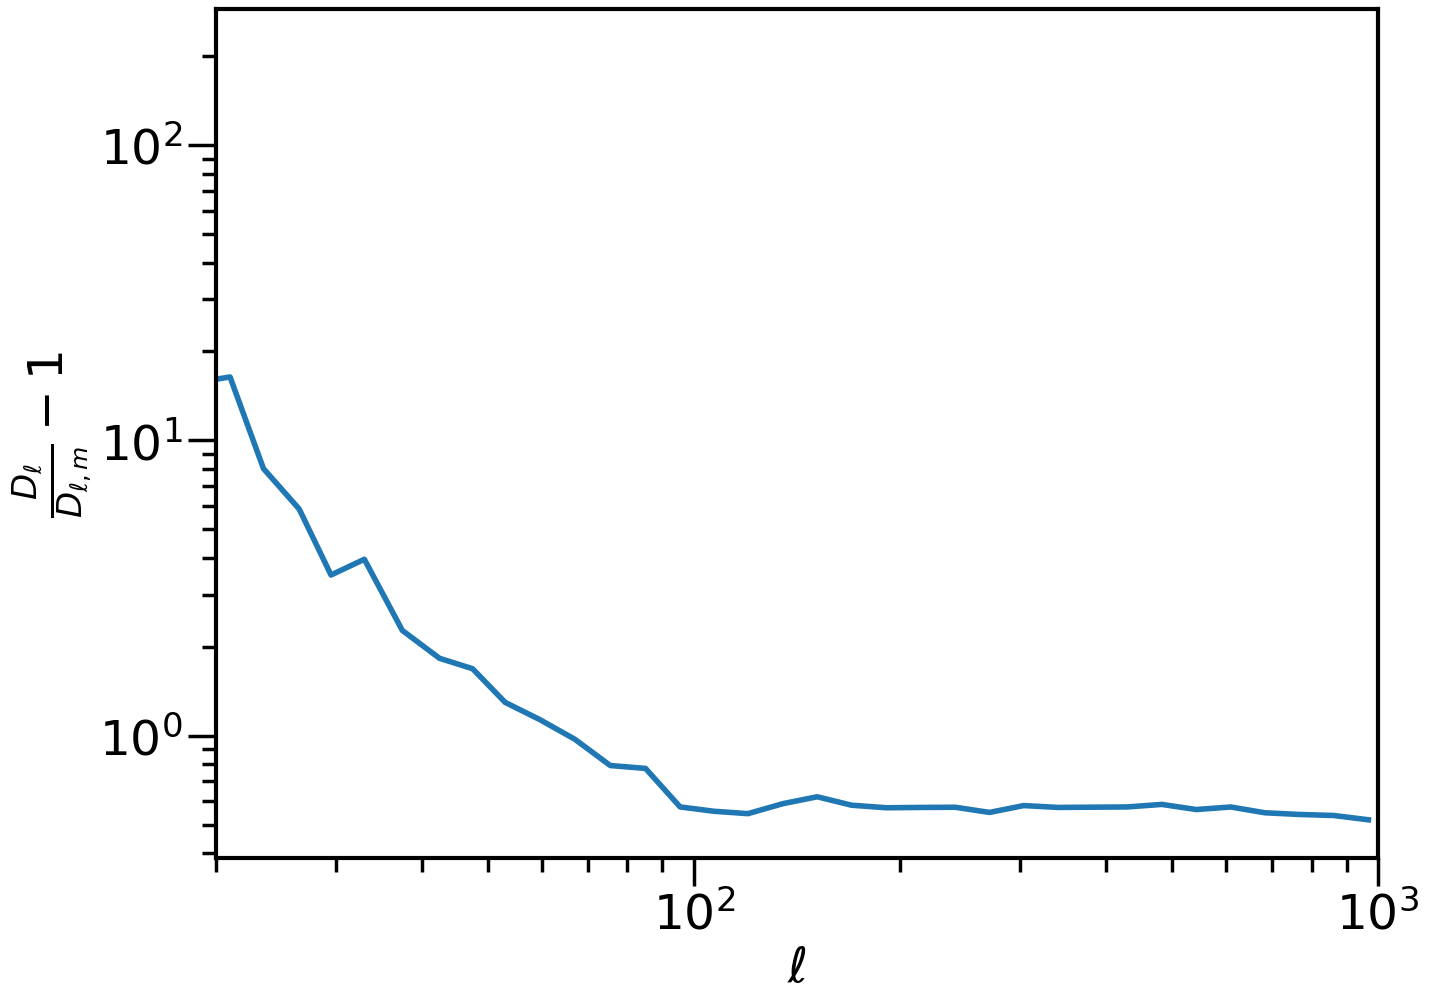

In [40]:
plot(lb,(wltb/pcl0_b))
xscale('log')
# plot(lb,cl0_win['t']['pcl_b'])
xscale('log')
yscale('log')
xlabel(r'$\ell$')
ylabel(r'$\frac{D_\ell}{D_{\ell,m}}-1$')
xlim(20,1000)
# ylim(0.001,.5)

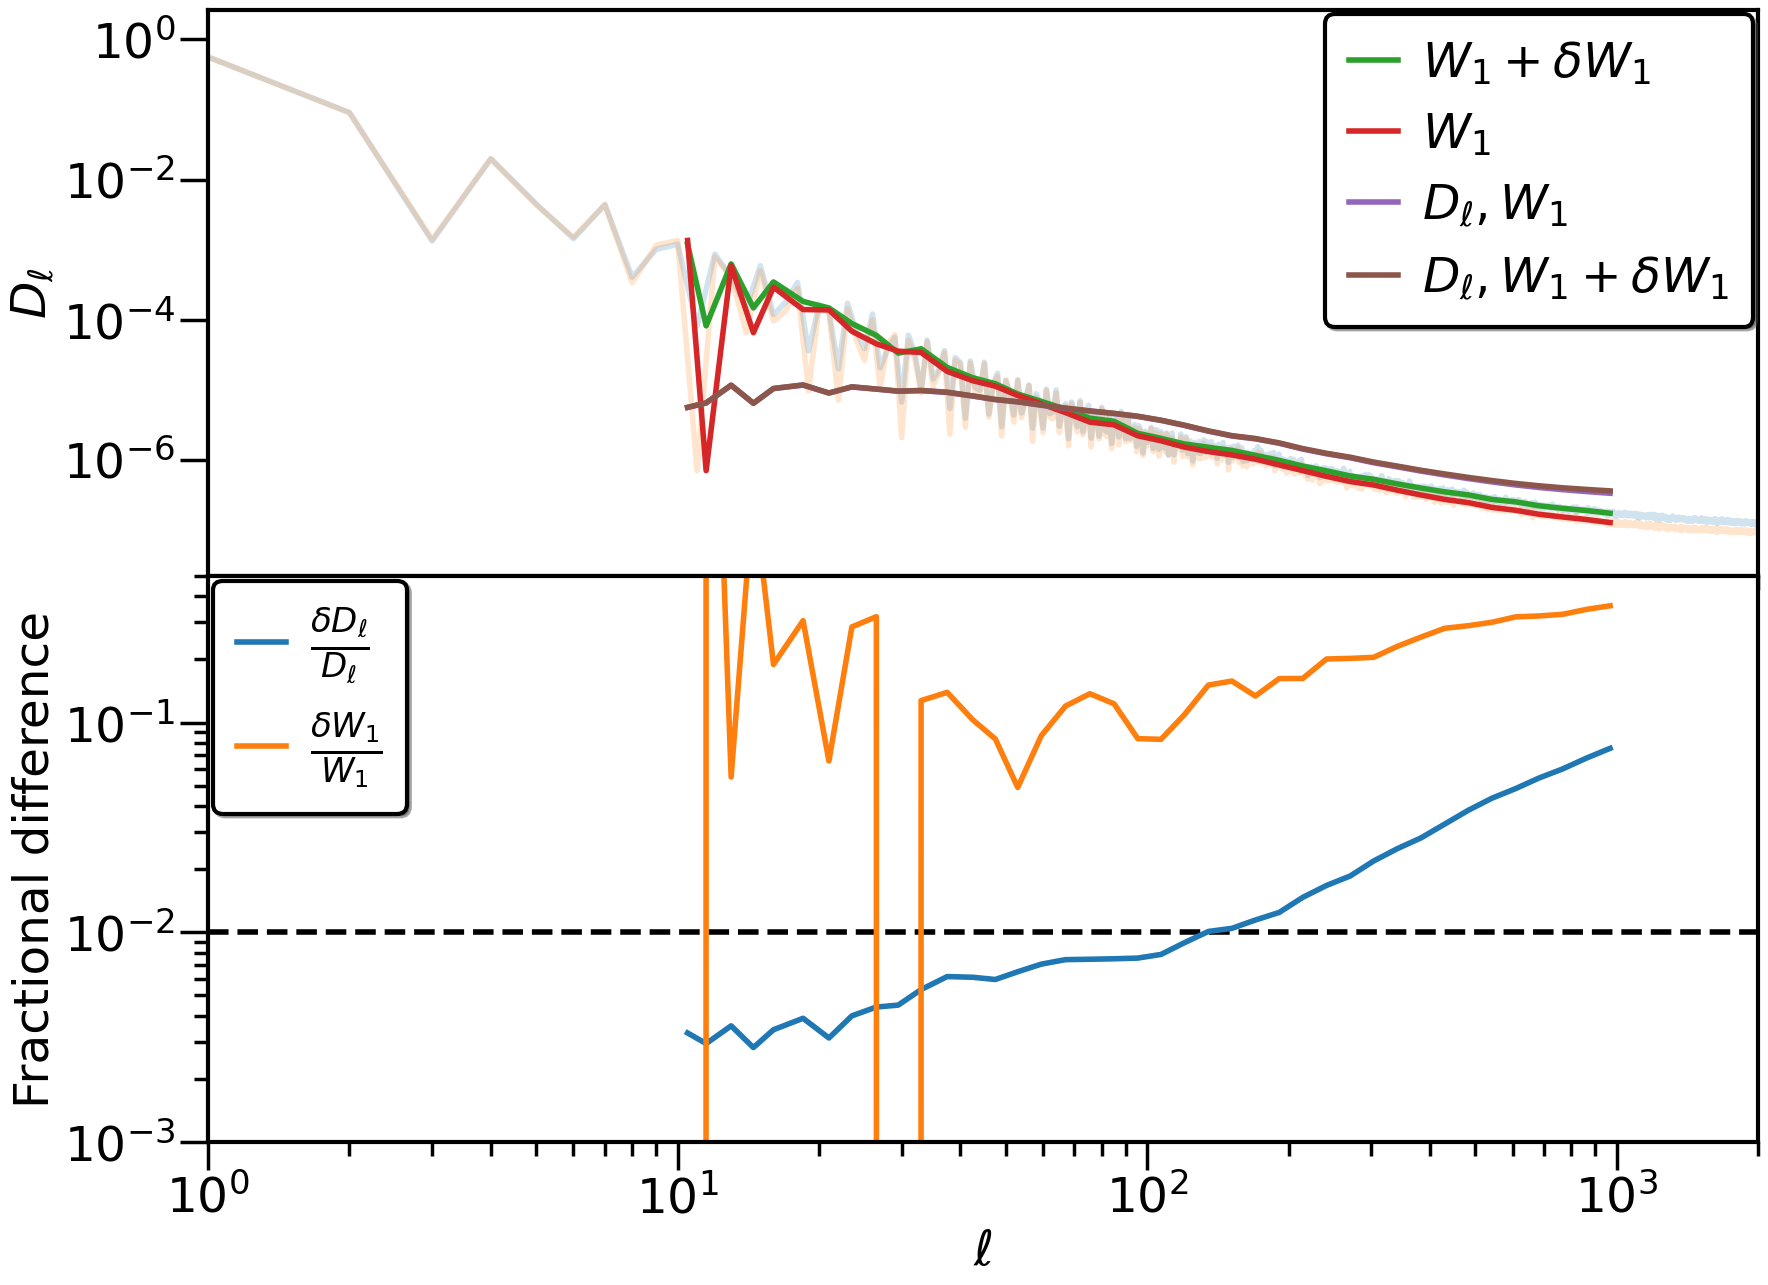

In [44]:
fig, ax =subplots(2,1,figsize=(20,15),sharex='col',sharey='row')
ps=ax[0]
pr=ax[1]
ps.plot(wlt,alpha=0.2)
ps.plot(wlt0,alpha=0.2)
ps.plot(lb,wltb,label='$W_1+\delta W_1$')
ps.plot(lb,wlt0b,label='$W_1$')

ps.plot(lb,pcl0_b,label='$D_\ell, W_1$')
ps.plot(lb,pcl2_b,label='$D_\ell, W_1+\delta W_1$')

pr.plot(lb,1.-pcl0_b/pcl2_b,label=r'$\frac{\delta D_\ell}{D_\ell}$')
pr.plot(lb,(wltb/wlt0b-1),label=r'$\frac{\delta W_1}{W_1}$')

pr.set_ylim(0.001,.5)
pr.set_xlim(1,2000)
pr.hlines(0.01,1,2000,ls='--',color='k')
ps.legend()
pr.legend()
ps.set_yscale('log')
ps.set_xscale('log')
pr.set_yscale('log')
pr.set_xlabel('$\ell$')
ps.set_ylabel('$D_\ell$')
pr.set_ylabel('Fractional difference')
fname=fig_home+'window_bias_Dl'
fname+='.pdf'
show()
# fig.savefig(fname,bbox_inches='tight',format='pdf')

# correlation function

In [42]:
lmax_xi=10000
l0th=np.arange(lmax_xi)
theta_min=1/60
theta_max=600./60
n_theta_bins=51
theta_bins=np.logspace(np.log10(theta_min),np.log10(theta_max),n_theta_bins+1)
th=np.logspace(np.log10(theta_min),np.log10(theta_max),n_theta_bins*80)

n_theta_bins=21
theta_bins=np.logspace(np.log10(theta_min),np.log10(theta_max),n_theta_bins+1)

theta_bins_center=0.5*(theta_bins[1:]+theta_bins[:-1])
thb=theta_bins_center*1
n_theta_bins=len(thb)
binn=binning()
bu=binn.bin_utils(r=th,r_bins=theta_bins)

In [45]:
#Hankel Transform setup
WT_kwargs={'l':l0th,'l_cut_weights':None,'theta':th*d2r,'s1_s2':[(0,0)],
           'wig_d_taper_order_low':16,'wig_d_taper_order_high':20}
# if globals().get('WT') is None:
WT=wigner_transform(**WT_kwargs )
# WT_b=wigner_transform(**WT_kwargs)
WT_b=WT
WT.gather_data()

Wigner ell max of  9999  too low for theta_min. Recommendation based on first few zeros of bessel  (0, 0)  : [ 8267.18129527 18976.63069812 29749.32518786 40536.30944032
 51328.71413721]


/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/wigner_transform.py:122: RuntimeWarning: divide by zero encountered in true_divide
  taper_f=np.cos((self.l[None,:]-l_max_low[:,None])/(l_max_high[:,None]-l_max_low[:,None])*np.pi/2.)
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/wigner_transform.py:122: RuntimeWarning: invalid value encountered in true_divide
  taper_f=np.cos((self.l[None,:]-l_max_low[:,None])/(l_max_high[:,None]-l_max_low[:,None])*np.pi/2.)
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/wigner_transform.py:122: RuntimeWarning: invalid value encountered in cos
  taper_f=np.cos((self.l[None,:]-l_max_low[:,None])/(l_max_high[:,None]-l_max_low[:,None])*np.pi/2.)


Scattering WT data 1


In [46]:
nside=2048*2

In [47]:
z0=1 #1087
# zs_bin1=source_tomo_bins(zp=[z0],p_zp=np.array([1]),ns=30,use_window=use_window,nside=nside)
shear_zbins=lsst_source_tomo_bins(nbins=1,use_window=use_window,nside=nside,f_sky=f_sky)
galaxy_zbins=shear_zbins

ns0:  27.0
[0.10002    0.10082016 0.10162032 ... 2.99819964 2.9989998  2.99979996] 100 5
source_tomo_bins, zmax 5.0 2.999799959991998 0.5999699939987997
Tracer utils has no tracers
Tracer utils has tracers:  ['galaxy']
pk_params dict was none, intialized with default
cosmo_params dict was none, intialized with default
cosmology interpolation range 0.0 4.005
power spectra camb_pk_too_many_z
Win gen: step size 17 12288 31.0 10
Window done. Size: 0.0


/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/cov_utils.py:92: RuntimeWarning: invalid value encountered in true_divide
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/angular_power_spectra.py:23: RuntimeWarning: divide by zero encountered in true_divide
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/angular_power_spectra.py:115: RuntimeWarning: divide by zero encountered in true_divide


scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary


/verafs/home/sukhdeep/.local/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/sphtfunc.py:433: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  warnings.warn(
/verafs/home/sukhdeep/.local/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/sphtfunc.py:822: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  warnings.warn(
/verafs/home/sukhdeep/.local/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/sphtfunc.py:827: UserWarning: -> fwhm is 0.000000 arcmin
  warnings.warn(
/verafs/scratch/phy200040p/sukhdeep/project/skylens/skylens/survey_utils.py:126: RuntimeWarning: invalid value encountered in sqrt
  cl_map_noise=np.sqrt(cl_map)
/verafs/scratch/phy200040p/sukhdeep/project/skylens/skylens/survey_utils.py:132: RuntimeWarning: invalid value encountered in sqrt
  shear_zbins[i]['window_N']=np.sqrt(sh

In [48]:
w_alm=hp.map2alm(shear_zbins[0]['window'])
wlt0=hp.anafast(shear_zbins[0]['window'])

In [49]:
lmm=3*nside
lt=np.arange(lmm)
Nl=np.mean(wlt0[100:200])
Nl*=2
cov=2./(2*lt+1)/fsky*((wlt0+Nl)**2)
err=np.sqrt(cov)
err[:10]=0
# fl=1+0.4/np.sqrt(lmm)*np.sqrt(lt)
# fl=1+np.sqrt(err/wlt0)
# # w_alm2=hp.almxfl(w_alm,fl,inplace=False)
# w_alm2=w_alm+hp.synalm(err)

In [50]:
mask=shear_zbins[0]['window']!=hp.UNSEEN
# ww=hp.alm2map(w_alm2,nside=nside)#skylens_kwargs[0]['shear_zbins'][0]['window']*.995
ww=hp.synfast(err,nside=nside)
ww-=ww[mask].mean()
ww[~mask]=hp.UNSEEN
cl_map=ww+shear_zbins[0]['window']
cl_map[~mask]=hp.UNSEEN

cl_mapg=ww+shear_zbins[0]['window']
cl_mapg[~mask]=hp.UNSEEN

wlt=hp.anafast(cl_map)
ww[mask].mean(),cl_map[mask].mean(),shear_zbins[0]['window'][mask].mean()

(-1.6121860589563145e-18, 0.9999407873944105, 0.9999407873944122)

In [51]:
lw=np.arange(len(wlt0))
th_t,xi0=WT.projected_correlation(l_cl=lw,cl=wlt0,s1_s2=(0,0))
th_t,xi_err=WT.projected_correlation(l_cl=lw,cl=wlt,s1_s2=(0,0))

xi0b=binn.bin_1d(xi=xi0,bin_utils=bu)
xi_errb=binn.bin_1d(xi=xi_err,bin_utils=bu)

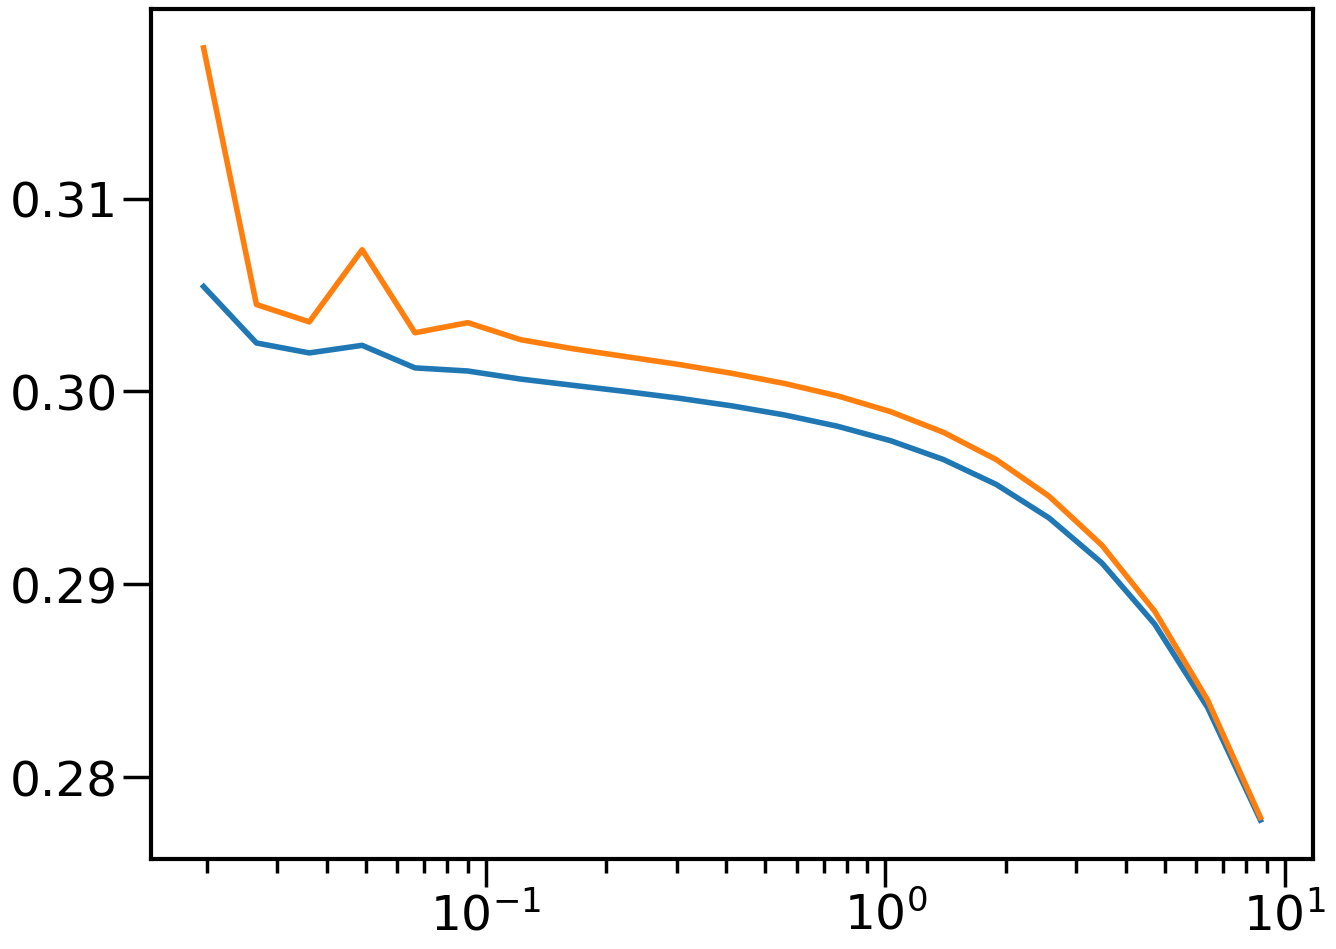

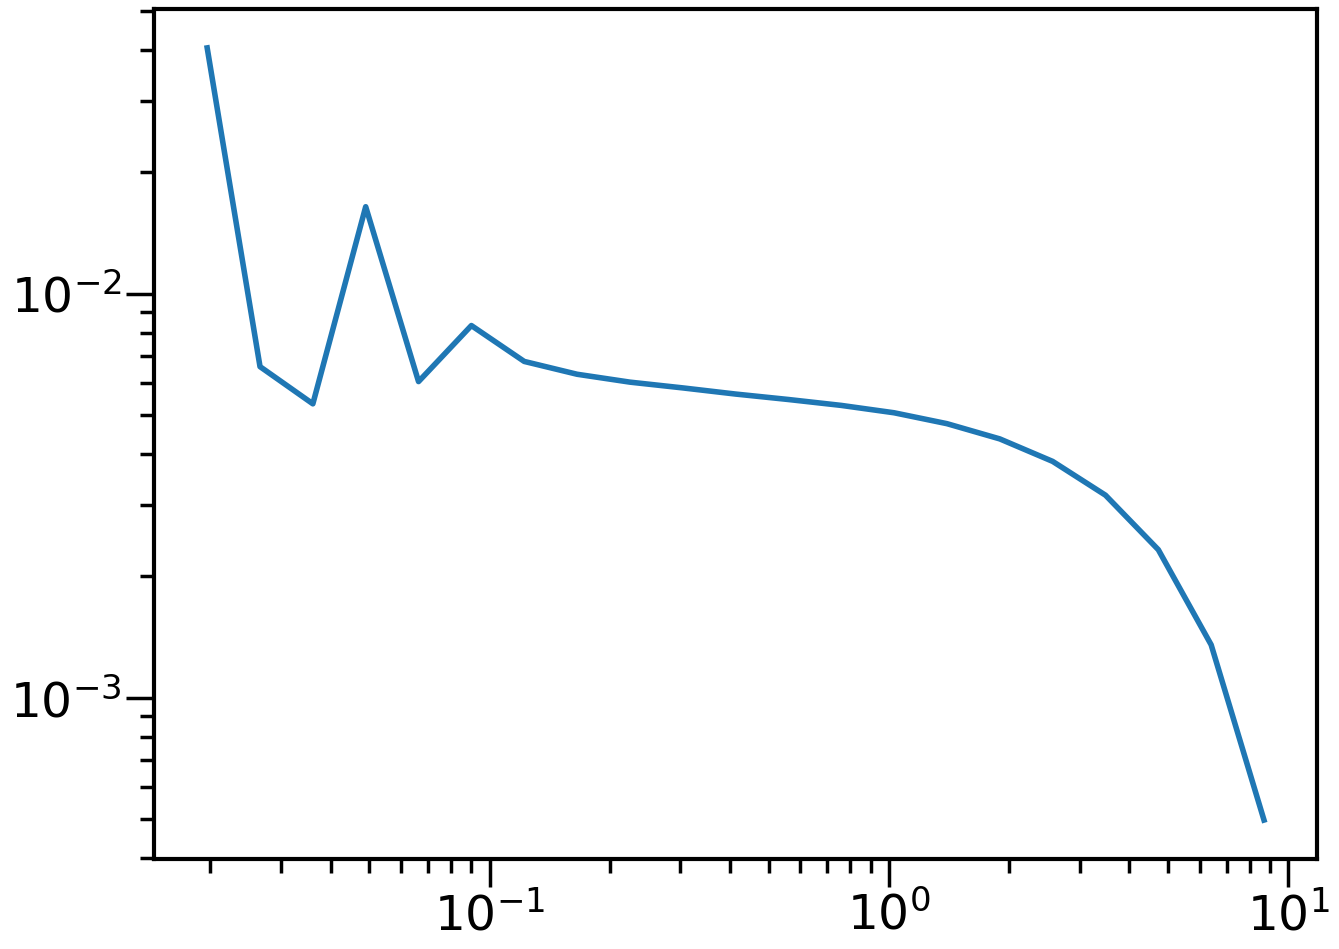

In [52]:
plot(thb,xi0b)
plot(thb,xi_errb)
xscale('log')
show()
plot(thb,xi_errb/xi0b-1)
xscale('log')
yscale('log')